In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import QuantLib as ql
import scipy.optimize as so
from scipy.interpolate import CubicSpline
from datetime import timedelta, date
import seaborn as sns
import scipy.stats as st

In [2]:
data = pd.read_excel("C:/Users/39393/OneDrive/Desktop/Python_projects_VSC/Homeworks Fixed/Fixed Income Project/DatiProgetto.xlsx")
data = data.drop([0,1,2])
data = data.drop("Instrument",axis=1)
data = data.rename(columns={"CF_LAST":"Yield","CF_NAME":"EUR","SEC_ACT_1":"Discount","MATUR_DATE":"MaturityDate"})
data["MaturityDate"] = pd.to_datetime(data["MaturityDate"])
data = data.dropna()
data["ql_dates"] = data.MaturityDate.apply(ql.Date().from_date)
data = data.reset_index(drop=True)

In [3]:
data

,Unnamed: 0,EUR,Yield,Discount,MaturityDate,ql_dates
0,3,ON ZERO YIELD,1.948112,0.999947,2023-01-24,"January 24th, 2023"
1,4,TN ZERO YIELD,1.953844,0.999894,2023-01-25,"January 25th, 2023"
2,5,1W ZERO YIELD,1.949104,0.999524,2023-02-01,"February 1st, 2023"
3,6,1M ZERO YIELD,2.237968,0.997880,2023-02-27,"February 27th, 2023"
4,7,2M ZERO YIELD,2.374333,0.995958,2023-03-27,"March 27th, 2023"
5,8,3M ZERO YIELD,2.536637,0.993706,2023-04-25,"April 25th, 2023"
6,9,6M ZERO YIELD,2.879780,0.985866,2023-07-25,"July 25th, 2023"
7,10,9M ZERO YIELD,3.066526,0.977500,2023-10-25,"October 25th, 2023"
8,11,1Y ZERO YIELD,3.148637,0.969310,2024-01-25,"January 25th, 2024"
9,12,1Y3M ZERO YIELD,3.169325,0.961687,2024-04-25,"April 25th, 2024"


[Text(0.5, 1.0, 'Spot rates curve')]

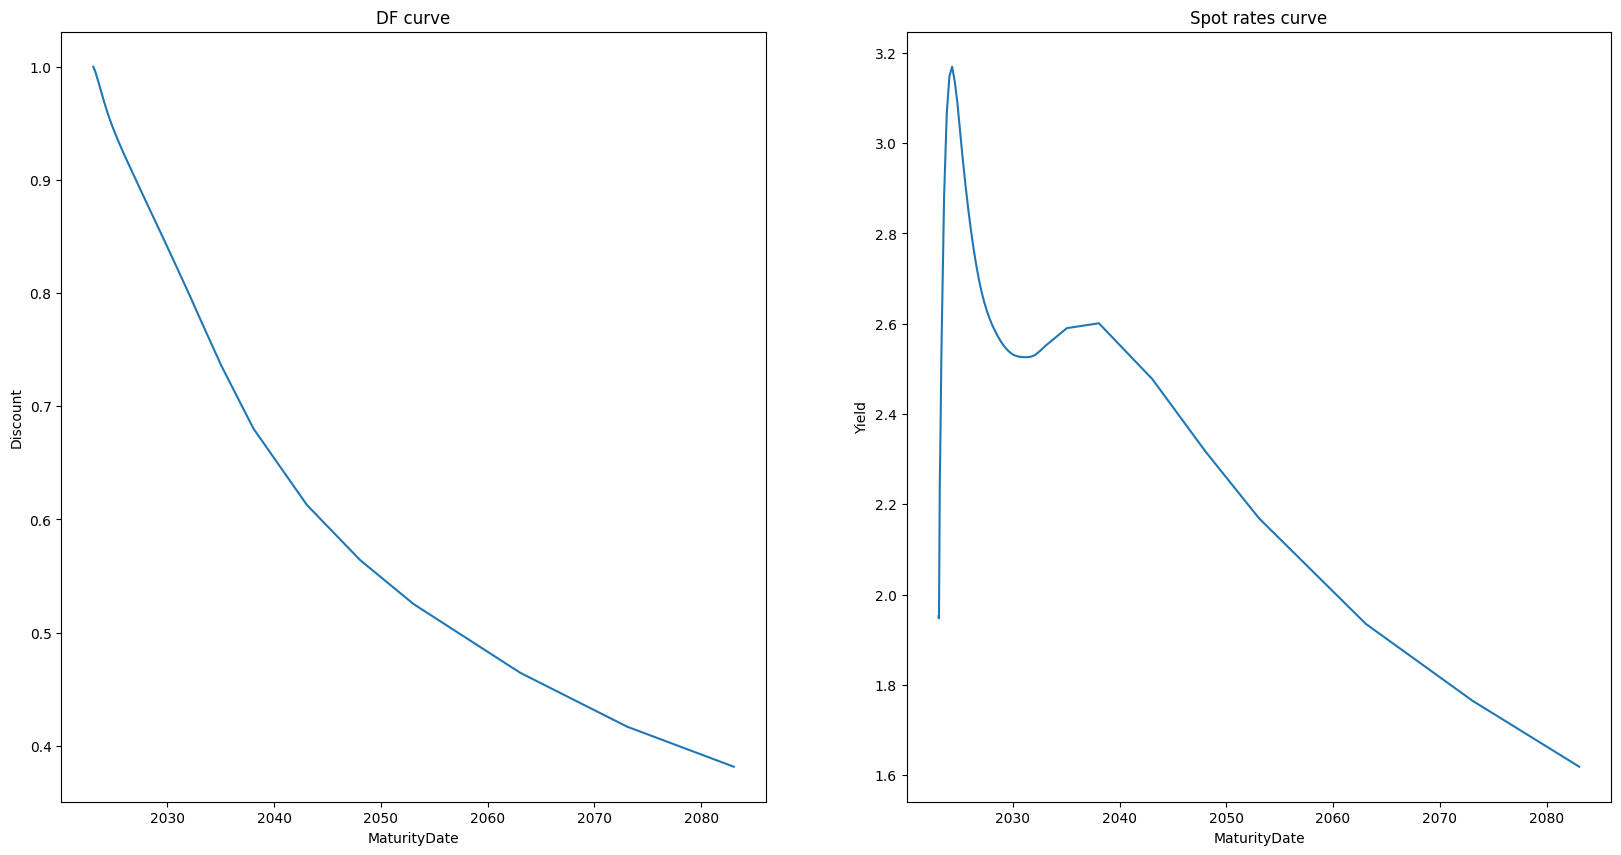

In [4]:
fig, axes = plt.subplots(1,2, figsize=(20,10))
sns.lineplot(data=data, x="MaturityDate", y="Discount",ax=axes[0]).set(title='DF curve')
sns.lineplot(data=data, x="MaturityDate", y="Yield",ax=axes[1]).set(title='Spot rates curve')

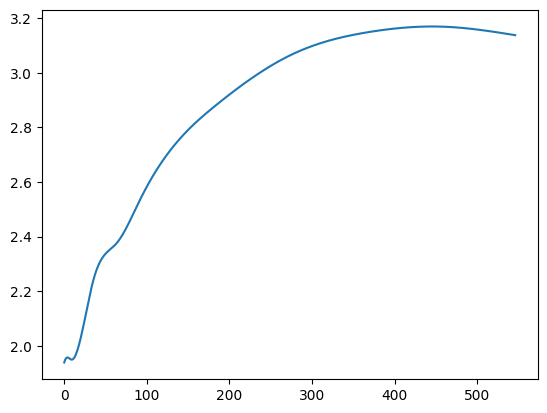

In [5]:
sdate = date(2023,1,23)   # start date
edate = date(2024,7,23)   # end date
calendar = pd.date_range(sdate, edate - timedelta(days=1),freq='d')
f = CubicSpline(data['MaturityDate'], data['Yield'])
newrate = f(calendar)
df1={'Yield':newrate,'MaturityDate':calendar}
df1=pd.DataFrame(df1)
plt.plot(df1.Yield)

In [6]:
df1.MaturityDate = df1.MaturityDate.apply(ql.Date().from_date)
trade_date = ql.Date(24,1, 2023)

In [7]:
times = []
for i in range(len(df1["MaturityDate"])):
    times.append(ql.Actual360().yearFraction(trade_date, df1.MaturityDate[i]))
df1["YF"] = times

In [8]:
df1 = df1.drop(0).reset_index()
df1.head()

,index,Yield,MaturityDate,YF
0,1,1.948112,"January 24th, 2023",0.000000
1,2,1.953844,"January 25th, 2023",0.002778
2,3,1.956650,"January 26th, 2023",0.005556
3,4,1.957192,"January 27th, 2023",0.008333
4,5,1.956132,"January 28th, 2023",0.011111


# Calibrating the Vasicek Model

In [9]:
def model_prices(kappa,theta,sigma,r0):
    
    B = (1 - np.exp(-kappa * t)) / kappa
    A = np.exp((theta - sigma**2 / (2 * kappa**2)) * (B - t) - sigma**2 / (4 * kappa) * B**2)
    p = A * np.exp(-B * r0)
    R = - np.log(p)/ t
    
    return R, A, B

def vasicek_error_function(params,r_observed,t):
    kappa, theta, sigma, r0 = params
    r_predicted = np.zeros_like(r_observed)
    r_predicted[0] = r0
    err = 0
    R,A,B=model_prices(kappa,theta,sigma,r0)
    for i in range(1, len(t)-1):
        err = err + (r_observed[i] - R[i]) ** 2

    return err

def libor_calibration(libor_rates,maturities):
  # Supply initial guess. Use theta array from assignment as baseline.
  init_theta = np.array([0.5, 0.05, 0.06, 0.03])
  init_kappa, init_mu, init_sigma, init_r0 = init_theta
  return so.fmin(vasicek_error_function, init_theta, args = (libor_rates, maturities), disp = 0)

In [10]:
# Define the observed data
r_observed = df1["Yield"].drop(0)/100
t = np.float64(df1.YF.drop(0))

# Define the bounds for each parameter
bounds = [(0.01, 1), (0.01, 1), (0.01, 1), (0, 0.1)]
# Define an initial guess for the parameters
x0 = [0.1, 0.06, 0.6, 0.02]

In [11]:
calibrated_theta = libor_calibration(r_observed,t)

In [12]:
print("Calibrated kappa is " + str(calibrated_theta[0]))
print("Calibrated mu is " + str(calibrated_theta[1]))
print("Calibrated sigma is " + str(calibrated_theta[2]))
print("Calibrated r_0 is " + str(calibrated_theta[3]))

Calibrated kappa is 1.1667328070015883
Calibrated mu is 0.07528856521940105
Calibrated sigma is 0.3750903289694537
Calibrated r_0 is 0.019042989649675136


In [13]:
# Define the number of Monte Carlo simulations to run
num_simulations = 1000

# Define the number of time steps for each simulation
num_timesteps = 365

# Define the time step size in years
dt = 1/num_timesteps


# Define the estimated parameters
kappa, mu, sigma, r0 = calibrated_theta

# Create an array to store the simulated short-term interest rates
r_simulated = np.zeros((num_simulations, num_timesteps))
r_simulated[:, 0] = r0

# Run the Monte Carlo simulation
for i in range(num_simulations):
    for j in range(1, num_timesteps):
        r_simulated[i, j] = r_simulated[i, j - 1] + kappa * (mu - r_simulated[i, j - 1]) * dt + sigma * np.sqrt(dt) * np.random.normal(0, 1)

In [14]:
kappa,theta,sigma,r0 = calibrated_theta
calibrated_prices, A, B = model_prices(kappa,theta,sigma,r0)

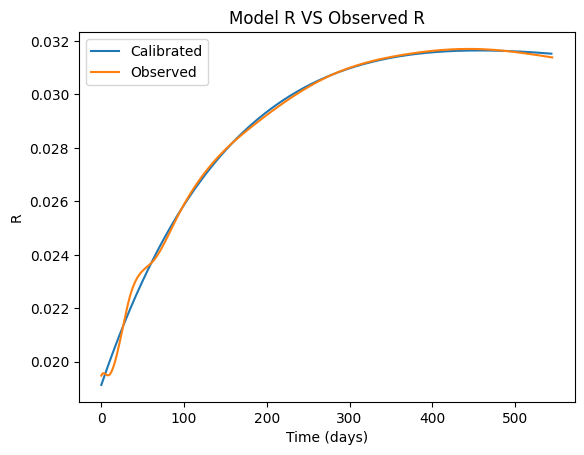

In [15]:
plt.plot(calibrated_prices)
plt.plot(df1.Yield/100)
plt.title("Model R VS Observed R")
plt.ylabel("R")
plt.xlabel("Time (days)")
plt.legend(["Calibrated", "Observed"])
plt.show()

# Money Market Account

In [17]:
def sim_vasicek(params, nsim):
    kappa,theta,sigma,r0 = params

    dt = 1 / nsim
    sqrt_dt = np.sqrt(dt)

    dW = sqrt_dt * np.random.normal(size=nsim)
    dr = kappa * (theta - r0) * dt + sigma * dW
    r = np.zeros(nsim + 1)
    r[0] = r0
    r[1:] = r0 + np.cumsum(dr)

    return r

In [18]:
def trapezoidal_rule(curve, tenor):
    
    curve_shift = np.roll(curve,-1)
    curve_shift[-1] = 0
    
    integral = 0.5 * (curve + curve_shift) * (tenor)
    
    return integral

In [19]:
def mma_approx(curve, tenor):
    mma = np.zeros_like(curve)
    mma[0] = 1

    integral = trapezoidal_rule(curve, tenor)
    
    for i in range(len(mma)-1):
        mma[i+1] = mma[i] * np.exp(integral[i])

    return mma

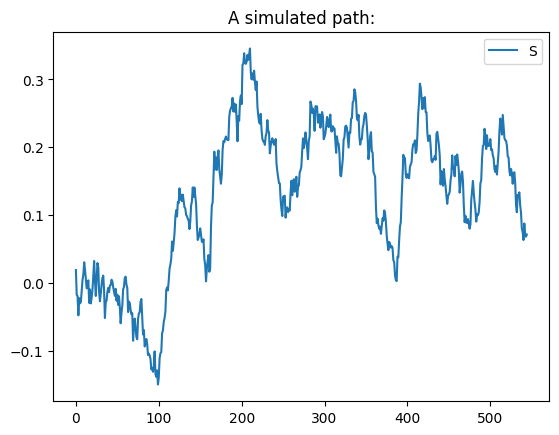

In [24]:
sim_rates = sim_vasicek(calibrated_theta, 544)
plt.plot(sim_rates)
plt.legend("Simulation")
plt.title("A simulated path:")
plt.show()

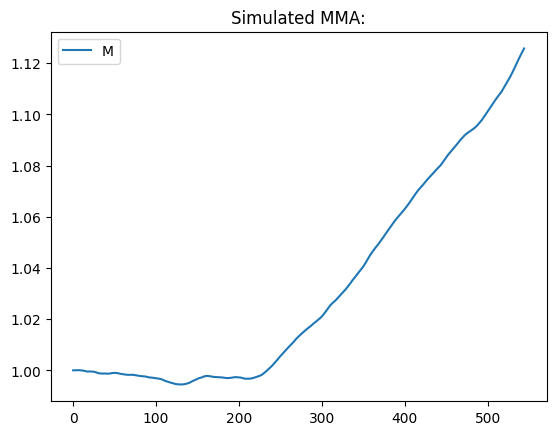

In [27]:
mma = mma_approx(sim_vasicek(calibrated_theta, 544), 1/544)
plt.plot(mma)
plt.legend("MMA")
plt.title("Simulated MMA:")
plt.show()

In [31]:
x, A, B = model_prices(kappa, theta, sigma, r0)

P = A * np.exp(-B * sim_vasicek(calibrated_theta, 544))

dt=np.zeros(len(t)) #vector of t(i)-t(i-1) for 1.5 y
for i in range(len(t)-1):
    dt[i]=t[i+1]-t[i]

t = dt[:-1]
x, A, B = model_prices(kappa, theta, sigma, r0)
P = A * np.exp(-B * sim_vasicek(calibrated_theta, 543))

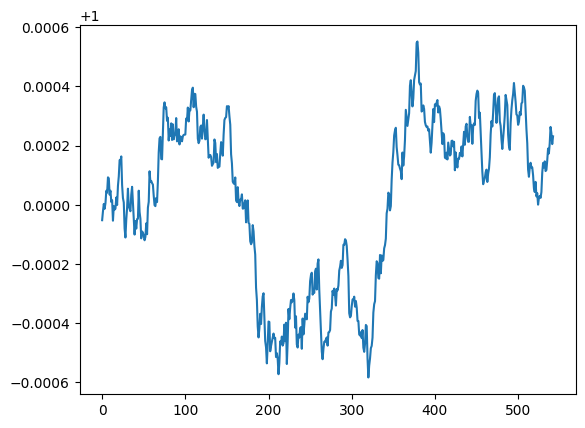

In [33]:
P = P[:-1]
plt.plot(P)

In [34]:
Six_forw=pd.DataFrame(P).rolling(window=180).apply(np.prod, raw = True)
Six_forw = Six_forw.dropna().reset_index().drop("index", axis=1)

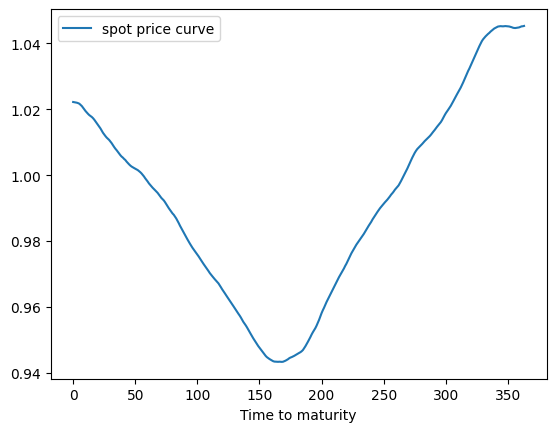

In [37]:
plt.plot(Six_forw,label="spot price curve")
plt.xlabel("Time to maturity")
plt.legend()
plt.show()

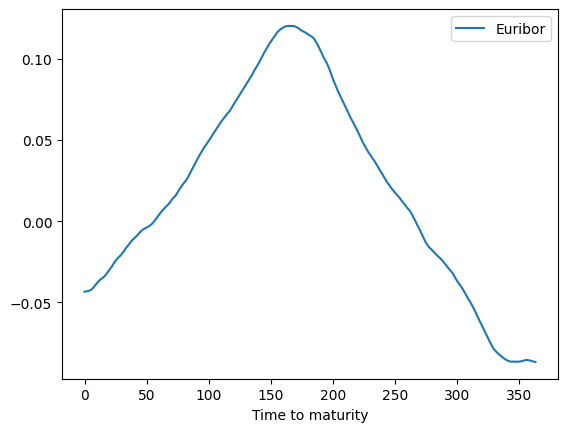

In [36]:
euri=((1/Six_forw)-1)*(1/0.5)
plt.plot(euri,label="Euribor")
plt.xlabel("Time to maturity")
plt.legend()
plt.show()

In [39]:
nsim = 365
MCsim = 10000

results = np.zeros((MCsim, nsim + 1))
for i in range(MCsim):
    results[i, :] = sim_vasicek(calibrated_theta, nsim)

Text(0.5, 1.0, 'Monte Carlo Simulation for ZCB Pricing')

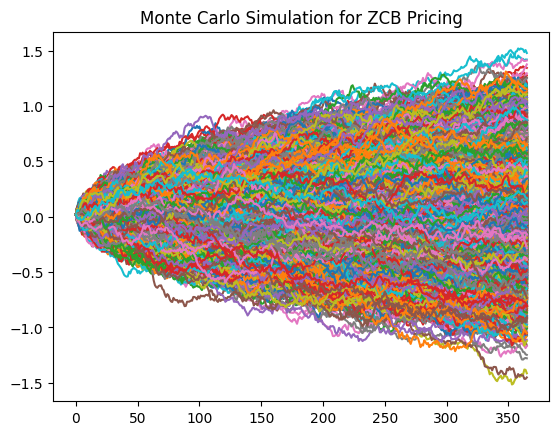

In [40]:
plt.plot(results.transpose())
plt.title("Monte Carlo Simulation for ZCB Pricing")

In [41]:
def Price(T, nsim, r):
    dt = 1 / T
    inte = np.zeros((nsim, T))
    for i in range(1, T):
        inte[:, i] = (r[:, i] + r[:, i - 1]) * 0.5 * dt
    summi = np.sum(inte, axis=1)
    P = np.exp(-summi)
    return P

In [42]:
simulated_price=Price(365,10000,results)

In [44]:
mean = simulated_price.mean()
std = simulated_price.std()
n = len(simulated_price)

conf_int = st.t.interval(alpha=0.95, df=n-1, loc=mean, scale=std/np.sqrt(n))
print("95% Confidence Interval:", conf_int, "The price is:", mean)

95% Confidence Interval: (0.9650559287063586, 0.9734308143379445) The price is: 0.9692433715221516


C:\Users\39393\AppData\Local\Temp\ipykernel_43540\2416257243.py:5: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  conf_int = st.t.interval(alpha=0.95, df=n-1, loc=mean, scale=std/np.sqrt(n))


In [760]:
# True Value
0.961687

0.961687